# Making a Colour Map with Three Divergent Points.

This notebook is Tutorial 1 of the [```CosmosCanvas```](https://github.com/mlarichardson/CosmosCanvas) package. This tutorial highlights the creation a perception-based colour map designed for plotting spectral index data. 

The colour map has two main divergent points and the default settings for these values are based on physics and conventional definitions for "steep" slopes and "flat" slopes in the spectral energy distribution in the radio regime. This makes the map immediately useful, although the values for these points can be changed by the user. These default divergent points are:
a) The "Steep" divergent point of alpha = -0.8 is assigned bright orange and more negative values (steeper) transition sequentially through adjacent colours to yellow.  
b) The "Flat" divergent point of alpha = -0.1  is dark cyan and more positive values (flatter) are sequential and end in dark plum.

Note that cyan is the complementary colour of orange. We blend these two colours together between a) and b) divergent points, creating 'compensating tones'. The third divergent point is where the two colours mix to form neutral grey. 

The overall scheme is monotonic in greyscale value with the lightest colours for steep slopes (e.g. yellow, the lightest colour, is steepest) and darkest colours for flat slopes (e.g. plum is the darkest and flattest). 

This tutorial begins by outlining the creation of the colour map using arbitrary settings for minimum and maximum values and for the "steepp" and "flatp" parameters set in specindex.py.  Subsequently it uses the cmap = yellow-blue in specindex.py for plotting examples of galaxy data. The first uses the default value; the second uses arbitrary values for divergent points a) and b) along with different min and maximums for the range of values; and the third produces an error map for the uncertainties in spectral index.  

This package includes specindex.py and galfits.py for plotting.  The latter requires the installation of APLpy and kapteyn packages.
Our package provides and uses the [```colourspace```](https://github.com/gillesferrand/colourspace) by Gilles Ferrand.

Authors: Mark L. A. Richardson, Gilles Ferrand, and Jayanne English Jun 25, 2021.

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Import our package and the colourspace package
import specindex as spx
from colourspace import maps

convertor = 'custom' (illuminant = 'D65')


In [3]:
# Set min/max values
min_value = -1.5
max_value = 0.3
name="CC-specindex-default"
# Create spectral index cmap, default steep/flat values used for "steepp" and "flatp" in specindex.py.
cmap, RGB = spx.create_cmap_specindex(min_value,max_value,modes=['clip'],out=True,name=name)

# Save the colourmap to mpl namespace
matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB['clip'],cmap), name=cmap)


loading gamut from /Users/mrichardson/Work/Research/Jayanne/FinalGitDevelopment/colourspace/gamut/Cmax_res10_full.npy
creating cmap 'CC-specindex-default' for Matplotlib (1022 steps)
writing ./cmap_CC-specindex-default.png (32x1022)


Note, the colour map can be used for any range of values, even beyond the min_value and max_value defined here. The reason the min and max values are passed in is to that the Yellow and Cyan points remain at the physically defined Steep and Flat values. But they can be changed too. E.g.,

In [4]:
min_value_compare = -2.0
max_value_compare = 2.0

steep_compare = -0.5
flat_compare = 0.5

name_compare='CC-specindex-compare'
cmap_compare, RGB_comp = spx.create_cmap_specindex(min_value_compare,max_value_compare,modes=['clip'],out=True,
                                         steepp=steep_compare,flatp=flat_compare,name=name_compare)

matplotlib.cm.register_cmap(cmap=matplotlib.colors.ListedColormap(RGB_comp['clip'],cmap_compare), name=cmap_compare)


creating cmap 'CC-specindex-compare' for Matplotlib (1022 steps)
writing ./cmap_CC-specindex-compare.png (32x1022)


By rescaling the maps to 0:1 using the test_cmaps function, we can compare two colour maps side by side:

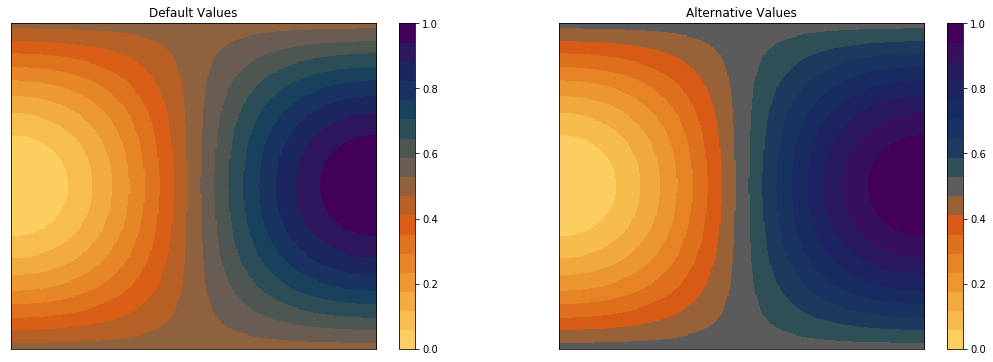

In [5]:
spx.test_cmap_showme_compare(cmap,cmap_compare,0,1,nsteps=17,t1="Default Values",t2="Alternative Values")

An important point here is the gray value marks the midpoint between steep and shallow, which is not necessarily at the middle of the full range colour map set by min_value and max_value.

OK, from here on we will use the reference colour map, but we hope the process for the comparison colour map makes it clear how to set different values for the steep (orange) and flatt (dark cyan) points.

loading gamut from /Users/mrichardson/Work/Research/Jayanne/FinalGitDevelopment/colourspace/gamut/Cmax_res10_sRGB.npy


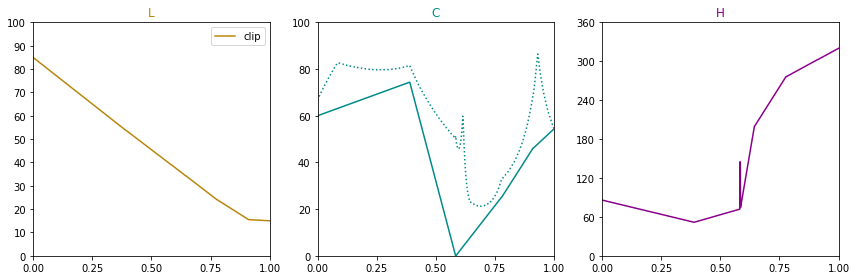

In [6]:
# Let's show the original colour map in LCH space again rescaled to 0:1 using the plot_path function.
axes = maps.plot_path(cmap, space='LCH', stack='H', axes=[]  , styles=['-' ], legend_label='clip')


In this case, L (luminosity) on the y-axis is monotonically decreasing in greyscale value as the data value x-axis increases. C (chroma) changes saturation with the data value; the dotted line shows the limits for chroma in the gamut of the colour space. Note the desaturation at neutral grey.  H (hue) on the y-axis is designated by an angle on the colour wheel. 

Now let's show what this colour map looks like for a galaxy. The galaxy used here is NGC 3079, taken from the CHANGES B configuration data. This is featured in [```Irwin et al. (2019)```](https://ui.adsabs.harvard.edu/abs/2019AJ....158...21I/abstract) and can be downloaded from the CHANG-ES catalogue at https://www.queensu.ca/changes/. For now we use the aplpy library to plot the FITS data, although it is not optimal for making figures as desired. We will transition this to a more user friendly package soon.

In [7]:
import galfits as gal

In [8]:
# Set galaxy information
name='N3079'
title='NGC 3079'
fits_file="example_data/SpecIndex_N3079.FITS"
RA = [10., 1., 57.8]    # hh.mm.ss
DEC = [55., 40., 47.0] # deg.mm.ss
RADIUS = 0.04 # degrees
shift = [0.0, 0.2/60.] # degrees

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


TypeError: WCS projection has 4 dimensions, so expected 2 (an Nx4 array and the origin argument) or 5 arguments (the position in each dimension, and the origin argument). Instead, 3 arguments were given.

<Figure size 612x309.6 with 0 Axes>

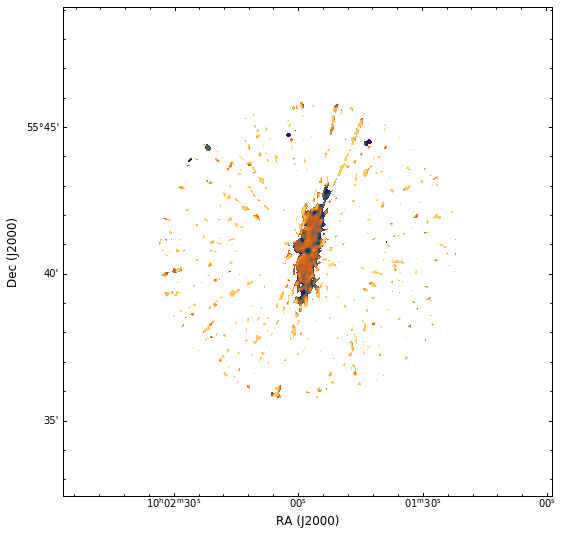

In [9]:
# Plot galaxy
ticks = [min_value,-0.8,-0.35,0.1,max_value]
nsteps=18

fig = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,min_value,max_value,cmap,ticks=ticks,nsteps=nsteps)
#fig = gal.plot_galaxy(fits_file,RA,DEC,RADIUS,shift,min_value,max_value,cmap)


fig.savefig('plot.png')